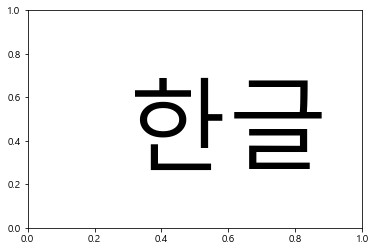

In [1]:
# Import Libraries

import lime
from lime import lime_tabular

import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')
plt.text(0.3, 0.3, '한글', size=100)
plt.rc('axes',unicode_minus=False)

import numpy as np

import pandas as pd
import shap
shap.initjs()

import seaborn as sns

import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings(action='ignore')

from xgboost import XGBClassifier

In [2]:
# Import data

df = pd.read_excel("Dataset_with SQ.xlsx")
df.head()

,pid,gid,성별,나이,보유대수,연평균주행거리,초중고생,정책인지도,기술이해도,최종학력,...,electric,hydrogen,Gu_AB,SQ_평균구매가,SQ_1_class,SQ_1_fuel,SQ_2_class,SQ_2_fuel,SQ_3_class,SQ_3_fuel
0,31,1,1,31,1,10000,0,3,2,2,...,1,0,2,3000.0,5,1,0,0,0,0
1,31,2,1,31,1,10000,0,3,2,2,...,1,0,2,3000.0,5,1,0,0,0,0
2,31,3,1,31,1,10000,0,3,2,2,...,1,0,2,3000.0,5,1,0,0,0,0
3,31,4,1,31,1,10000,0,3,2,2,...,0,0,2,3000.0,5,1,0,0,0,0
4,31,5,1,31,1,10000,0,3,2,2,...,0,1,2,3000.0,5,1,0,0,0,0


In [3]:
y=df.lca.copy()
display(y.head())

x=df.drop(['choice',
           'Gu_AB',
          'pid',
          'gid',
           'lca',
           'gasoline',
           'diesel',
           'electric',
           'hydrogen',],axis=1)
display(x.head())

0    3
1    3
2    3
3    1
4    4
Name: lca, dtype: int64

,성별,나이,보유대수,연평균주행거리,초중고생,정책인지도,기술이해도,최종학력,가구소득,정치적성향,...,class_type_h,fuel_cost_h,price_h,SQ_평균구매가,SQ_1_class,SQ_1_fuel,SQ_2_class,SQ_2_fuel,SQ_3_class,SQ_3_fuel
0,1,31,1,10000,0,3,2,2,580,3,...,2,50,4000,3000.0,5,1,0,0,0,0
1,1,31,1,10000,0,3,2,2,580,3,...,1,150,3000,3000.0,5,1,0,0,0,0
2,1,31,1,10000,0,3,2,2,580,3,...,2,150,5000,3000.0,5,1,0,0,0,0
3,1,31,1,10000,0,3,2,2,580,3,...,1,50,3000,3000.0,5,1,0,0,0,0
4,1,31,1,10000,0,3,2,2,580,3,...,2,50,5000,3000.0,5,1,0,0,0,0


In [4]:
cls=RandomForestClassifier(random_state=42)
#model=XGBClassifier(random_state=42)
cls.fit(x, y)
#cls.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [5]:
explainer=shap.TreeExplainer(cls)
shap_values=explainer.shap_values(x)

In [6]:
class_names = ['gasoline','diesel','electric','hydrogen']
print(class_names)

['gasoline', 'diesel', 'electric', 'hydrogen']


In [7]:
print(x.columns)

Index(['성별', '나이', '보유대수', '연평균주행거리', '초중고생', '정책인지도', '기술이해도', '최종학력', '가구소득',
       '정치적성향', 'infra_g', 'class_type_g', 'fuel_cost_g', 'price_g', 'infra_d',
       'class_type_d', 'fuel_cost_d', 'price_d', 'infra_e', 'class_type_e',
       'fuel_cost_e', 'price_e', 'infra_h', 'class_type_h', 'fuel_cost_h',
       'price_h', 'SQ_평균구매가', 'SQ_1_class', 'SQ_1_fuel', 'SQ_2_class',
       'SQ_2_fuel', 'SQ_3_class', 'SQ_3_fuel'],
      dtype='object')


<AxesSubplot:>

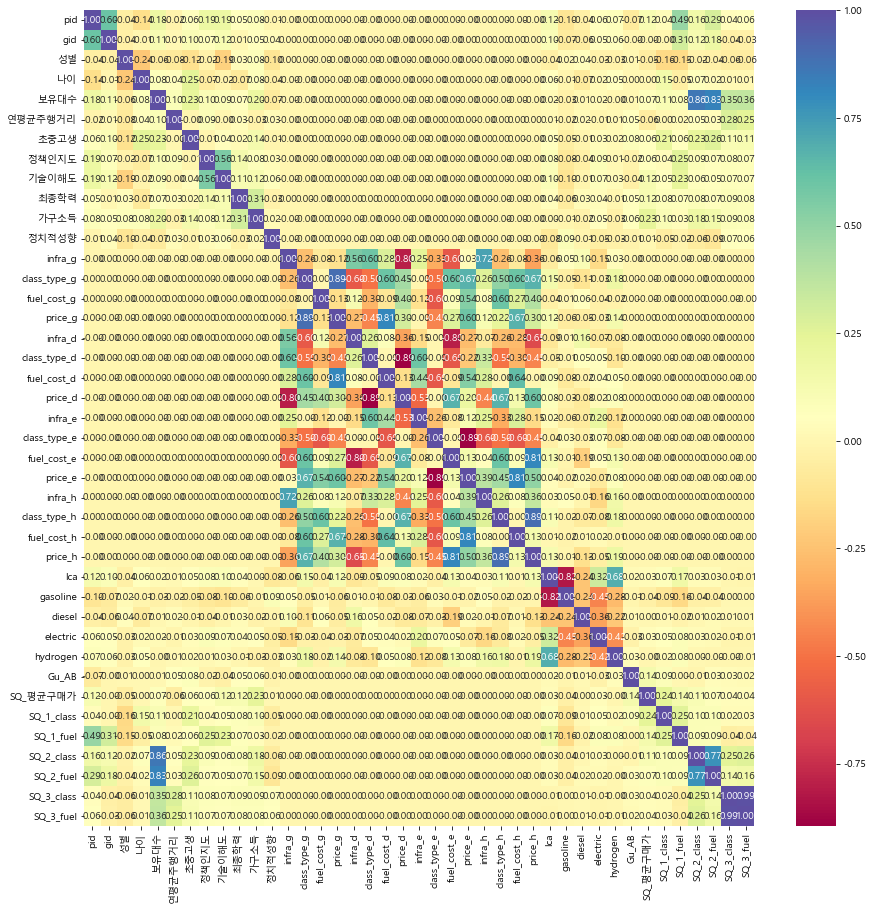

In [8]:
corr=df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(data=corr,annot=True,fmt='.2f',cmap="Spectral")

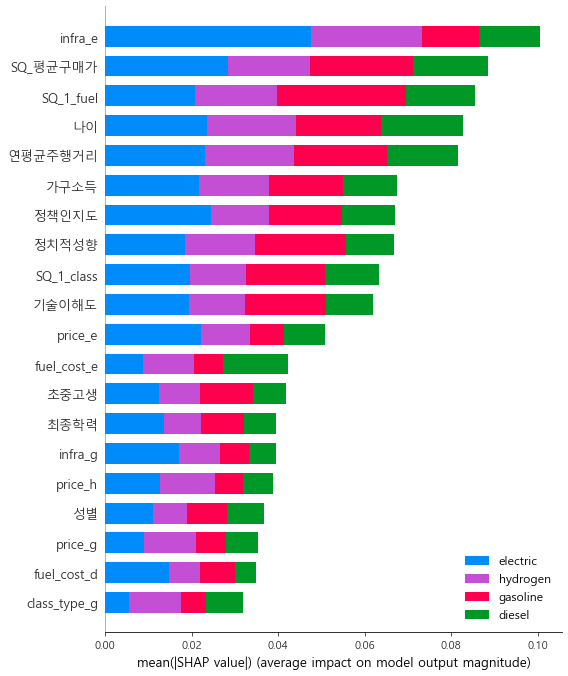

In [9]:
shap.summary_plot(shap_values,x.values,
                  plot_type='bar',
                  class_names=class_names,
                  feature_names=x.columns)

# 결과 분석 - Gasoline

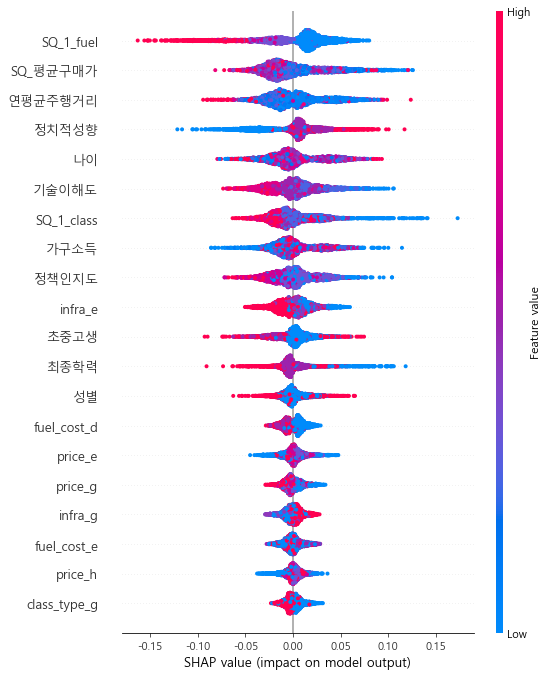

In [10]:
shap.summary_plot(shap_values[0],x.values,
                  class_names=class_names,
                  feature_names=x.columns)

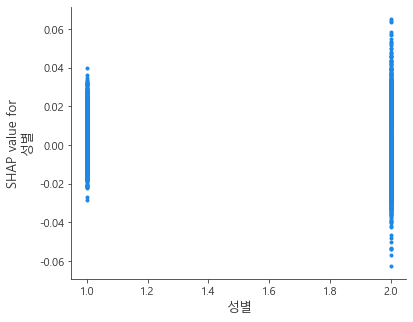

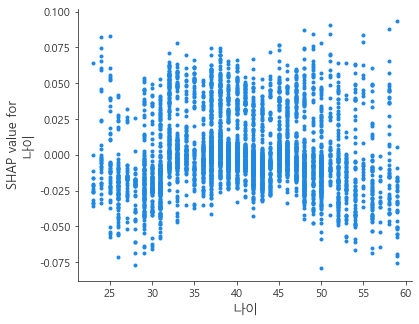

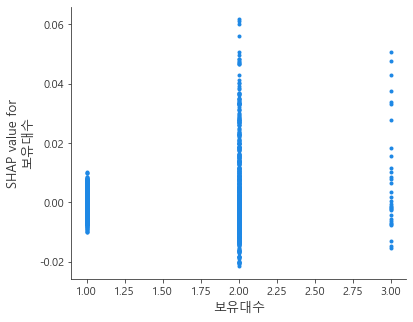

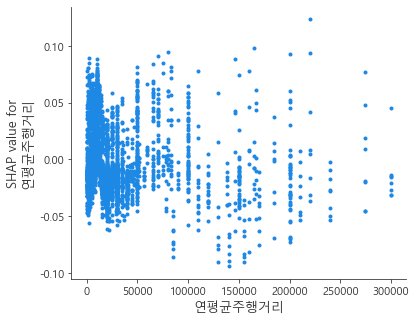

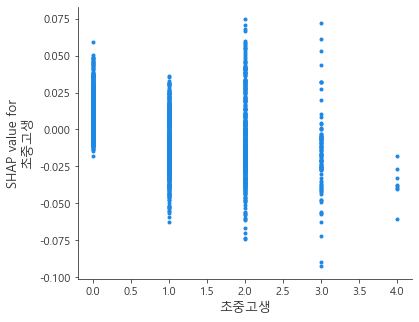

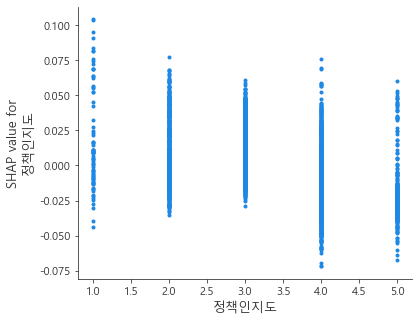

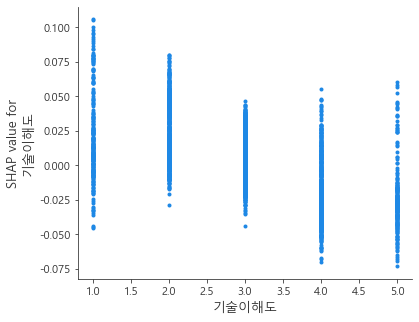

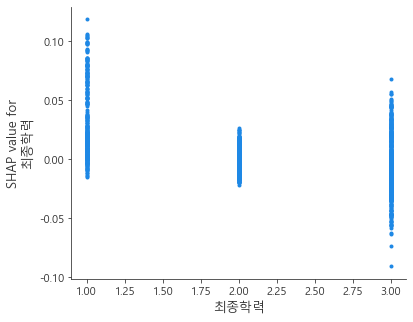

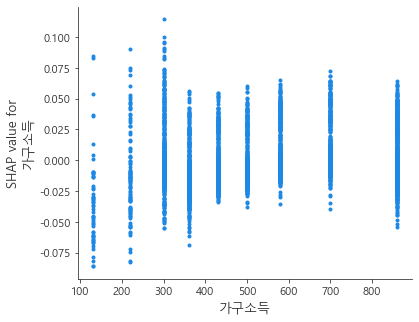

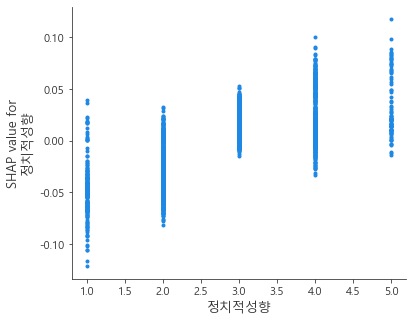

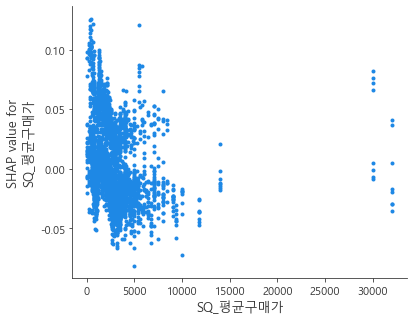

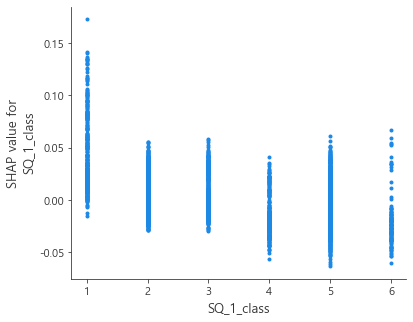

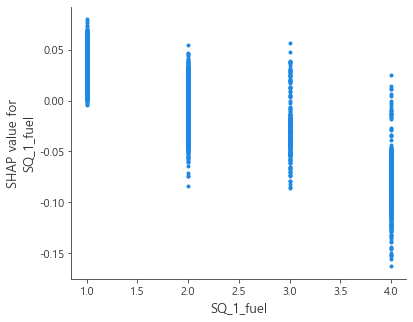

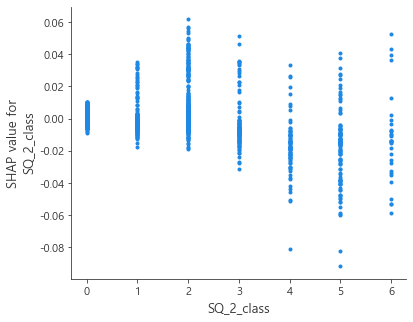

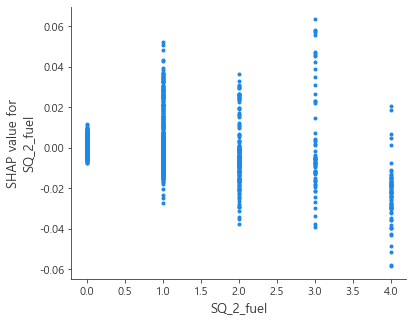

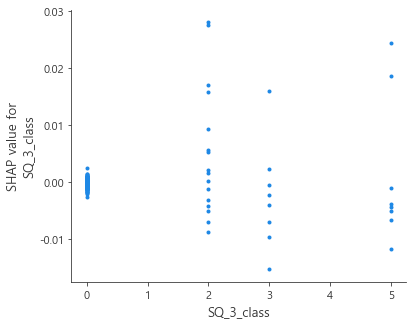

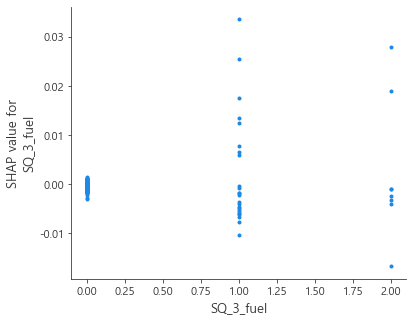

In [11]:
for i in range(0,10,1):
    shap.dependence_plot(i,
                     shap_values[0],x.values,
                     feature_names=x.columns,
                    interaction_index=None)
for i in range(26,33,1):
    shap.dependence_plot(i,
                     shap_values[0],x.values,
                     feature_names=x.columns,
                    interaction_index=None)

# 결과 분석 - Diesel

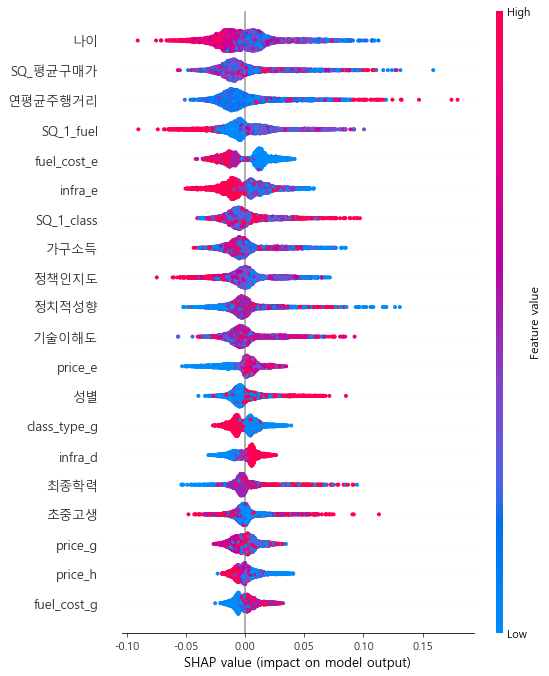

In [12]:
shap.summary_plot(shap_values[1],x.values,
                  class_names=class_names,
                  feature_names=x.columns)

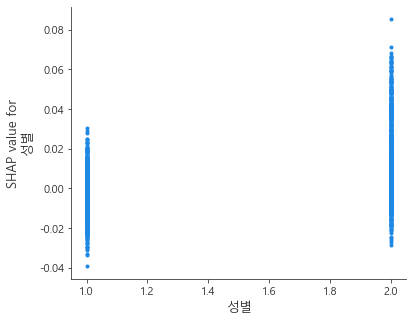

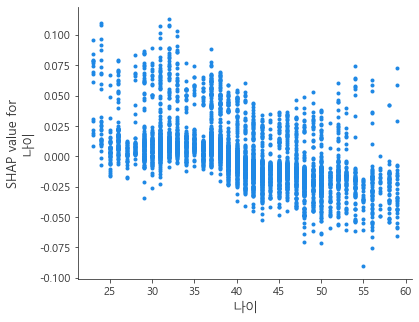

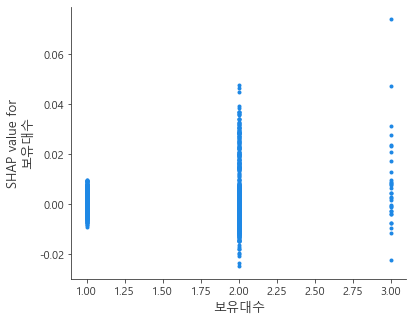

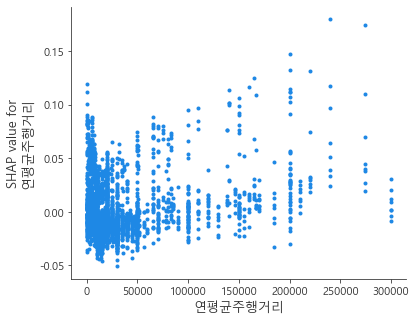

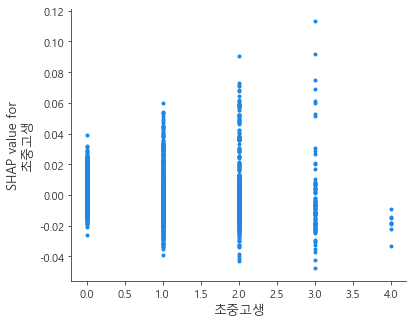

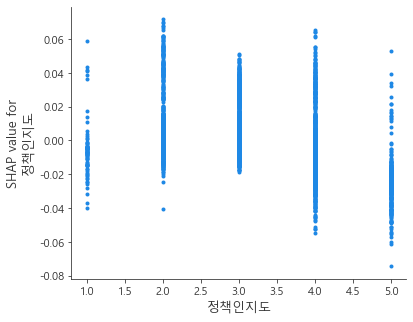

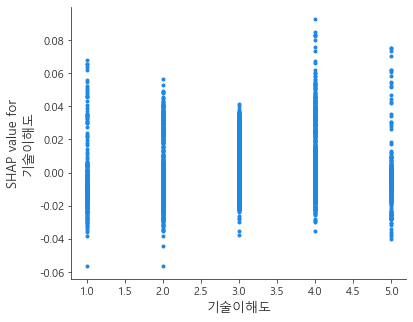

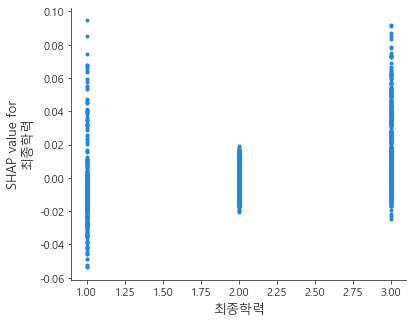

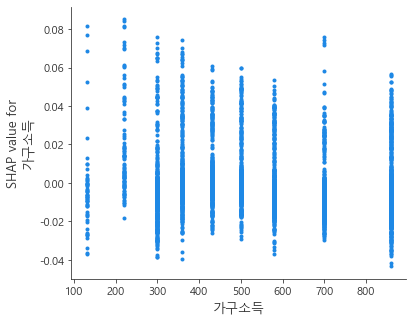

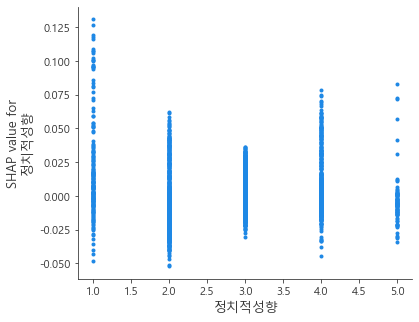

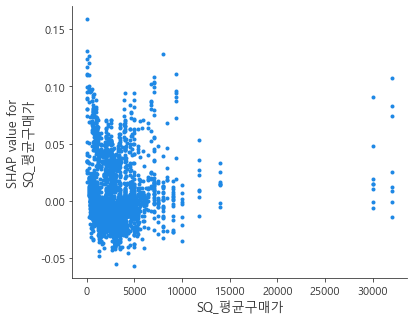

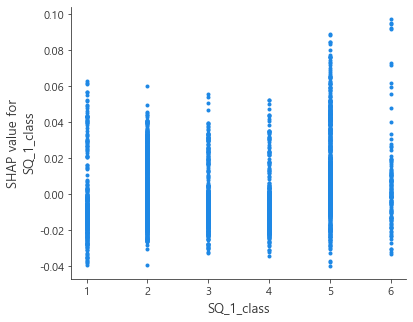

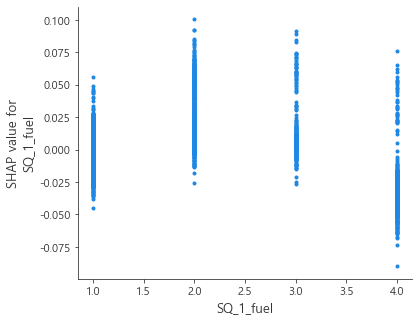

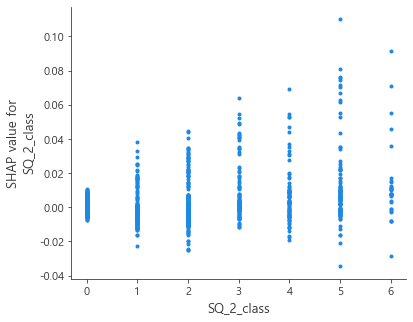

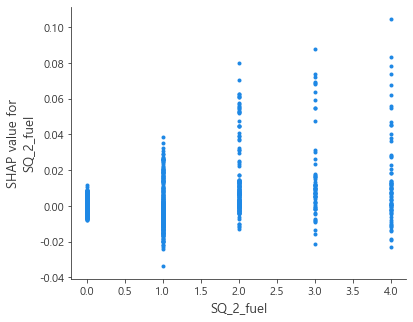

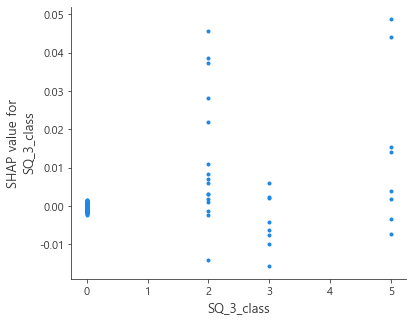

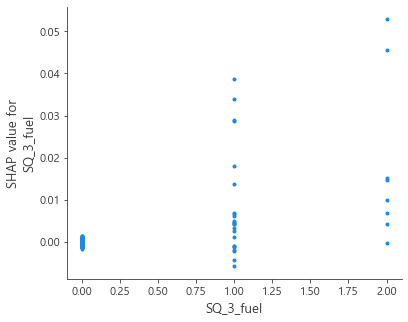

In [13]:
for i in range(0,10,1):
    shap.dependence_plot(i,
                     shap_values[1],x.values,
                     feature_names=x.columns,
                    interaction_index=None)
for i in range(26,33,1):
    shap.dependence_plot(i,
                     shap_values[1],x.values,
                     feature_names=x.columns,
                    interaction_index=None)

# 결과 분석 - Electric

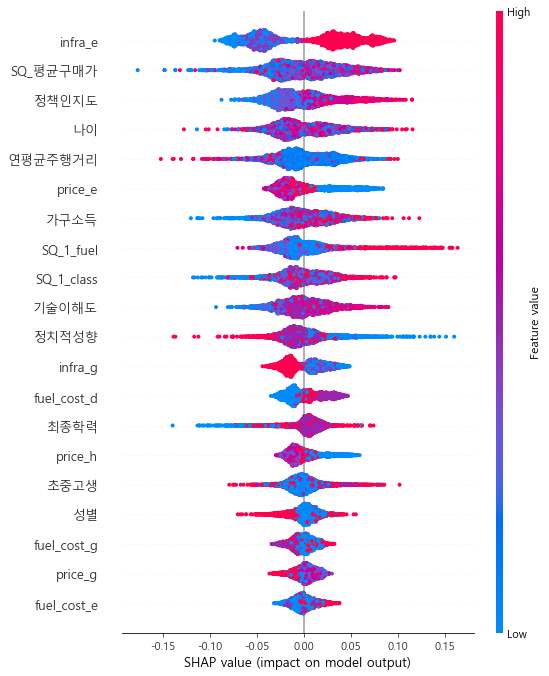

In [14]:
shap.summary_plot(shap_values[2],x.values,
                  class_names=class_names,
                  feature_names=x.columns)

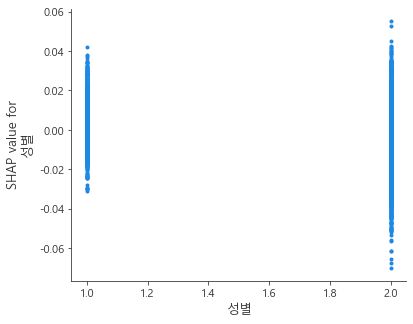

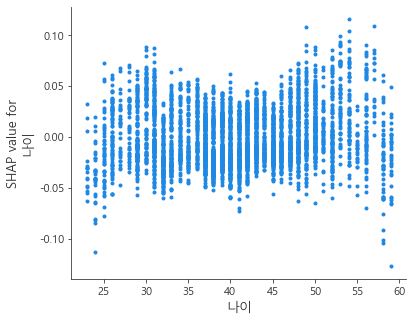

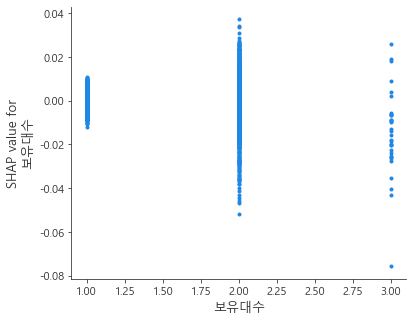

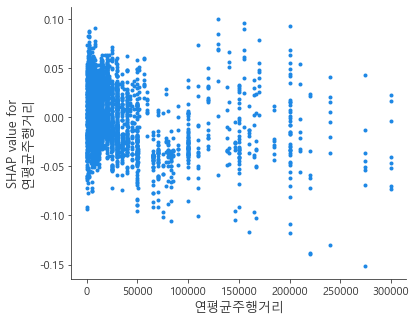

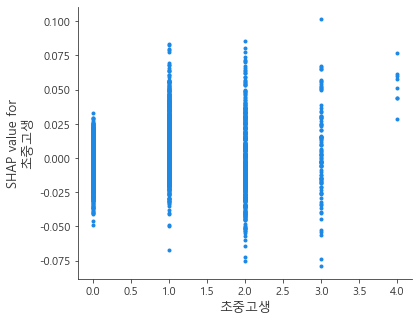

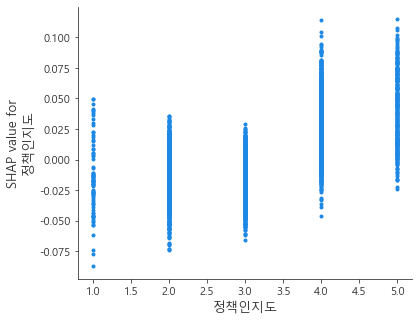

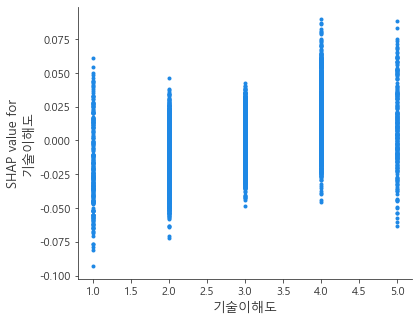

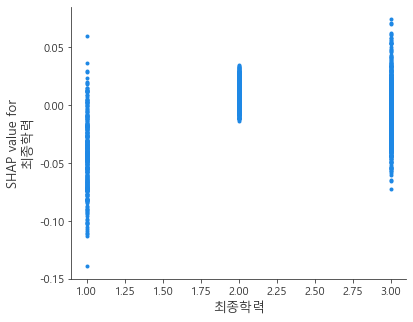

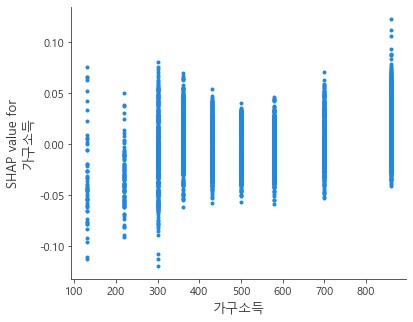

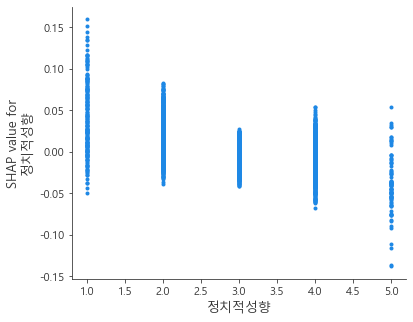

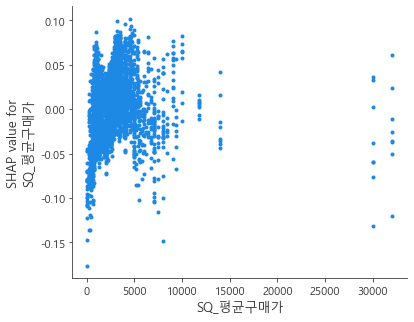

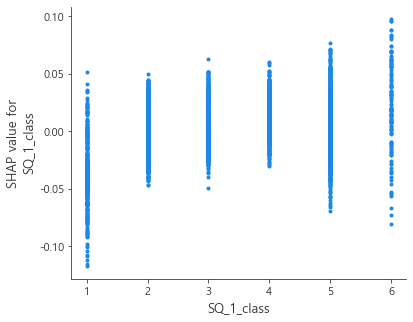

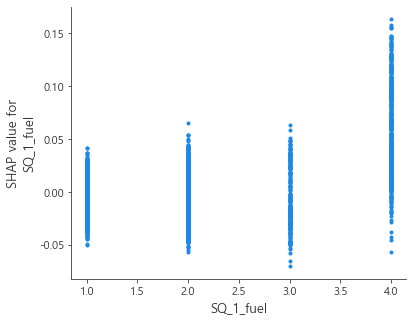

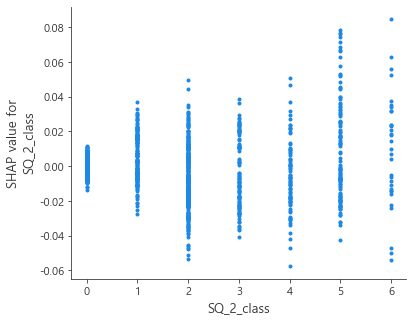

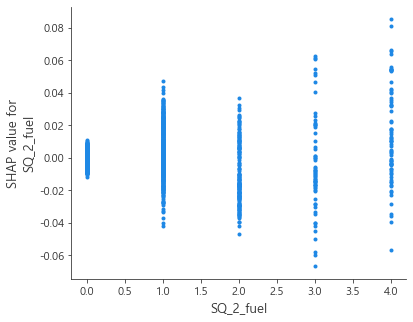

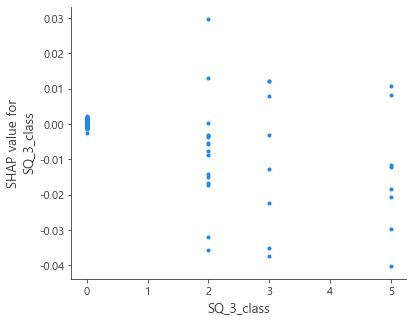

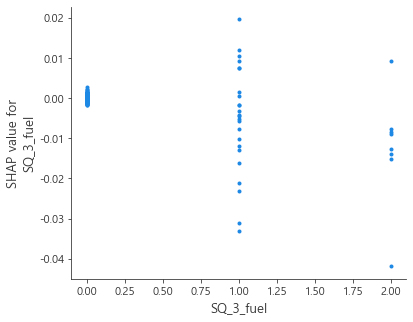

In [15]:
for i in range(0,10,1):
    shap.dependence_plot(i,
                     shap_values[2],x.values,
                     feature_names=x.columns,
                    interaction_index=None)
for i in range(26,33,1):
    shap.dependence_plot(i,
                     shap_values[2],x.values,
                     feature_names=x.columns,
                    interaction_index=None)

# 결과 분석 - Hydrogen

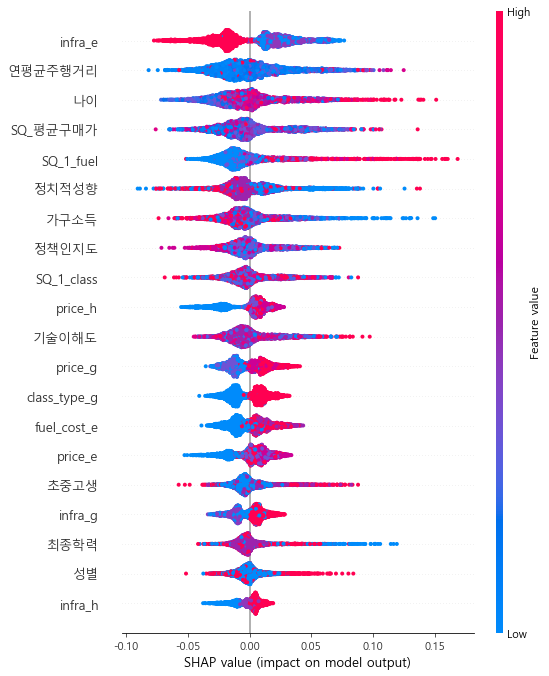

In [16]:
shap.summary_plot(shap_values[3],x.values,
                  class_names=class_names,
                  feature_names=x.columns)

In [ ]:
for i in range(0,10,1):
    shap.dependence_plot(i,
                     shap_values[3],x.values,
                     feature_names=x.columns,
                    interaction_index=None)
for i in range(26,33,1):
    shap.dependence_plot(i,
                     shap_values[3],x.values,
                     feature_names=x.columns,
                    interaction_index=None)

# Writing용 분석

AssertionError: 'shap_values' must have the same number of columns as 'features'!

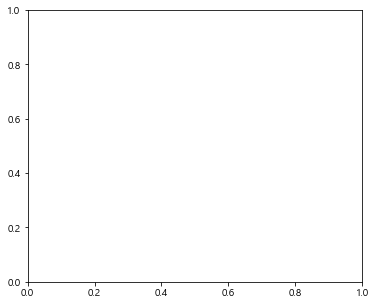

In [31]:
for i in range(0,33,1):
    shap.dependence_plot(i,
                     shap_values[0],x.values,
                     feature_names=x.columns,
                    interaction_index=None)

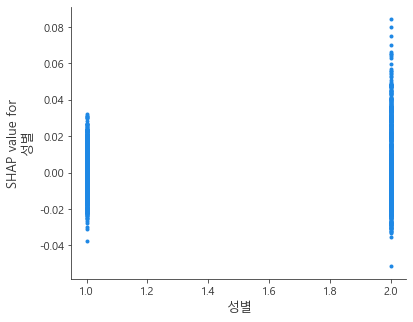

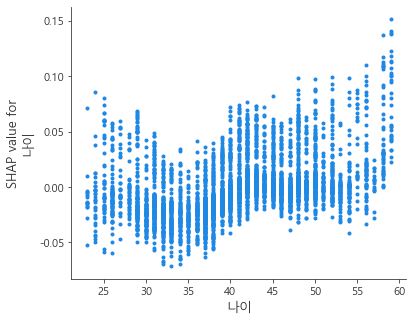

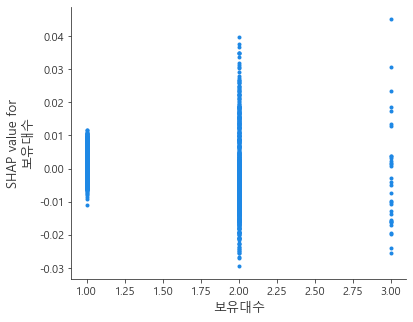

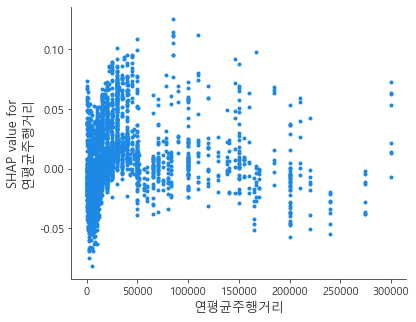

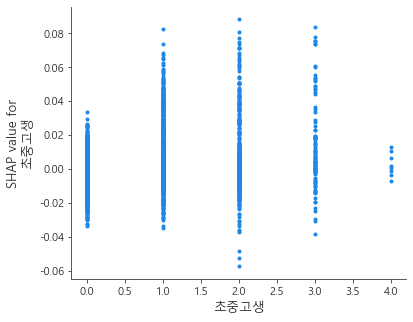

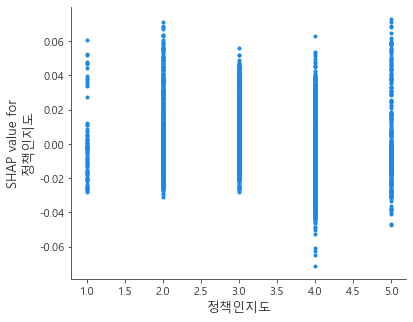

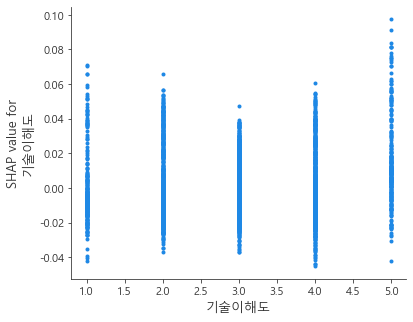

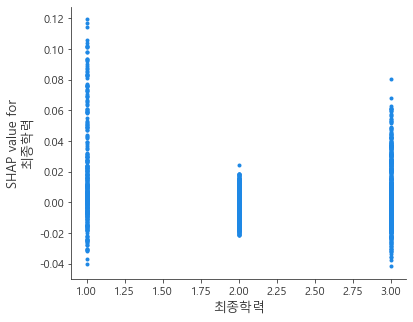

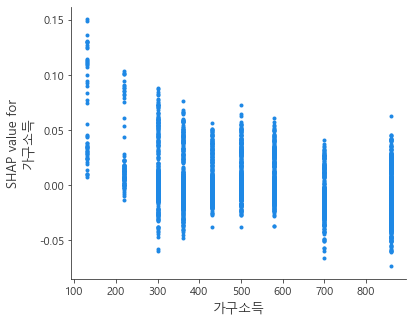

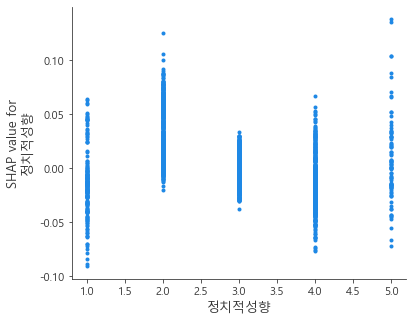

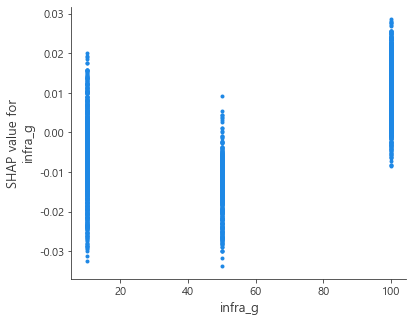

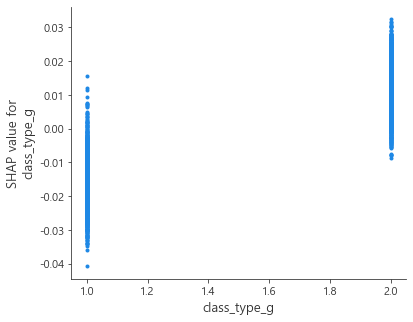

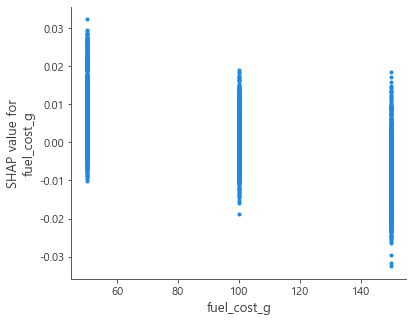

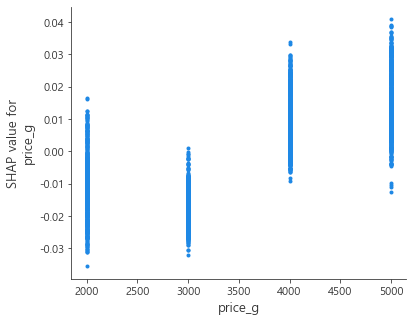

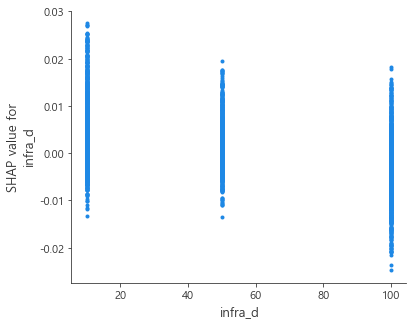

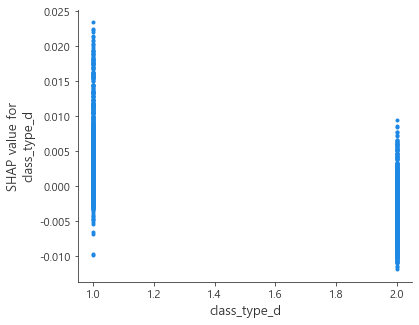

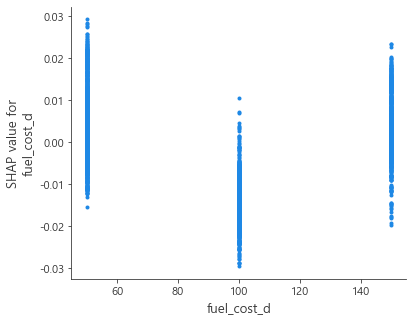

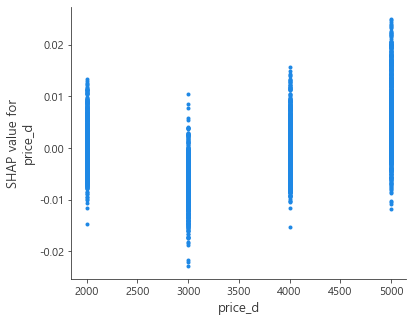

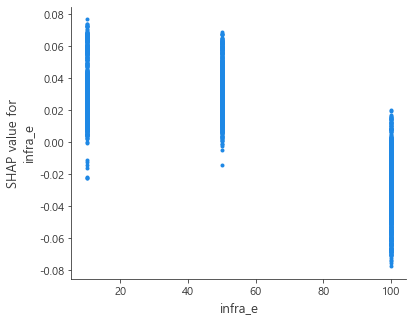

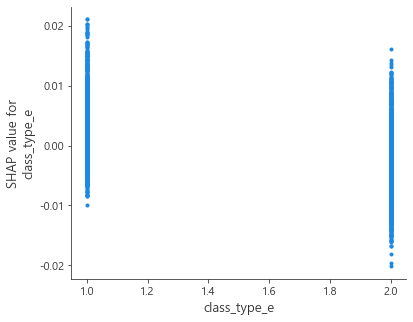

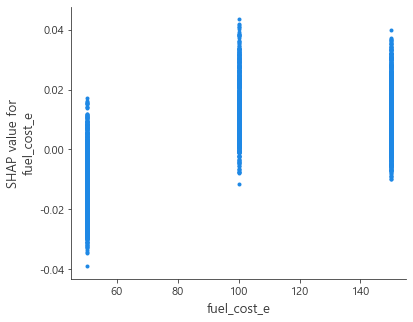

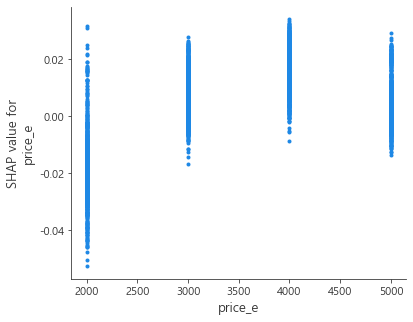

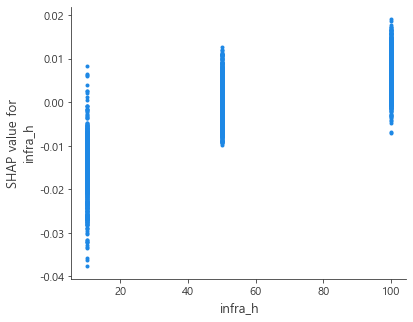

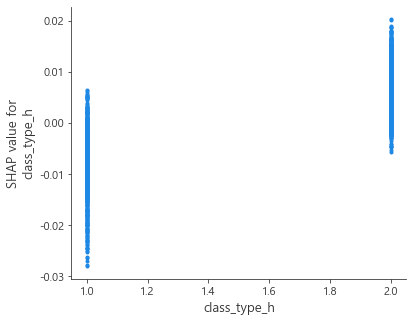

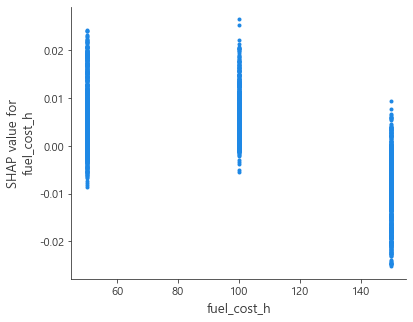

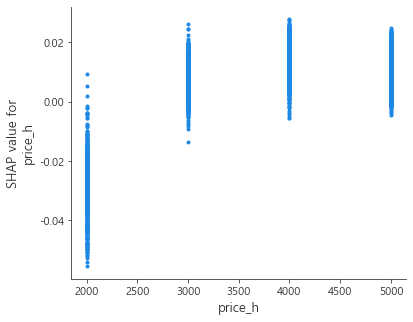

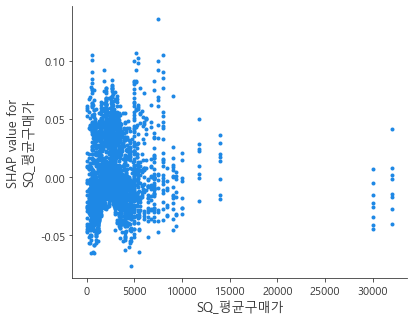

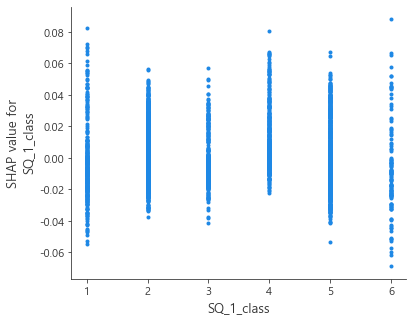

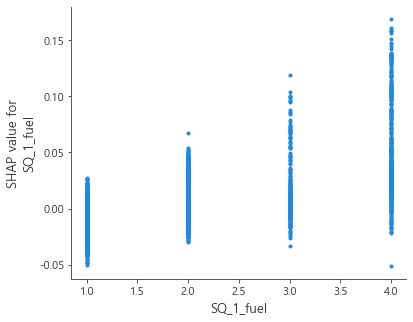

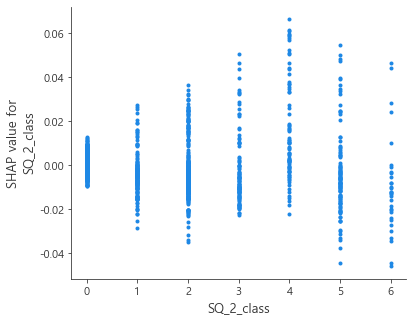

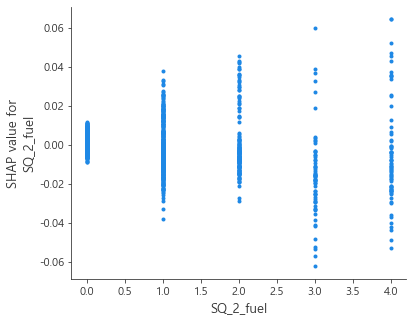

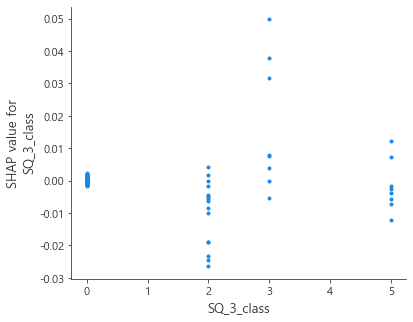

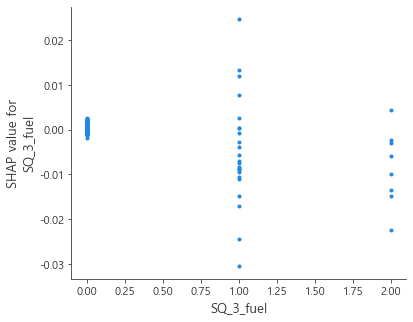

In [19]:
for i in range(0,33,1):
    shap.dependence_plot(i,
                     shap_values[3],x.values,
                     feature_names=x.columns,
                    interaction_index=None)

# 
# SQ 없이
# 

In [20]:
# Import data

df_wosq = pd.read_excel("Dataset_main.xlsx")
df_wosq.head()

,pid,gid,성별,나이,보유대수,연평균주행거리,초중고생,정책인지도,기술이해도,최종학력,...,infra_4,class_type_4,fuel_cost_4,price_4,choice,lca,gasoline,diesel,electric,hydrogen
0,31,1,1,31,1,10000,0,3,2,2,...,100,2,50,4000,electric,3,0,0,1,0
1,31,2,1,31,1,10000,0,3,2,2,...,100,1,150,3000,electric,3,0,0,1,0
2,31,3,1,31,1,10000,0,3,2,2,...,50,2,150,5000,electric,3,0,0,1,0
3,31,4,1,31,1,10000,0,3,2,2,...,100,1,50,3000,gasoline,1,1,0,0,0
4,31,5,1,31,1,10000,0,3,2,2,...,50,2,50,5000,hydrogen,4,0,0,0,1


In [21]:
y_wosq=df_wosq.lca.copy()
display(y_wosq.head())

x_wosq=df_wosq.drop(['choice',
           'pid',
           'gid',
           'lca',
           'gasoline',
           'diesel',
           'electric',
           'hydrogen',],axis=1)
display(x_wosq.head())

0    3
1    3
2    3
3    1
4    4
Name: lca, dtype: int64

,성별,나이,보유대수,연평균주행거리,초중고생,정책인지도,기술이해도,최종학력,가구소득,정치적성향,...,fuel_cost_2,price_2,infra_3,class_type_3,fuel_cost_3,price_3,infra_4,class_type_4,fuel_cost_4,price_4
0,1,31,1,10000,0,3,2,2,580,3,...,50,3000,50,1,50,4000,100,2,50,4000
1,1,31,1,10000,0,3,2,2,580,3,...,150,2000,100,1,50,5000,100,1,150,3000
2,1,31,1,10000,0,3,2,2,580,3,...,100,5000,100,1,150,5000,50,2,150,5000
3,1,31,1,10000,0,3,2,2,580,3,...,50,2000,100,2,100,2000,100,1,50,3000
4,1,31,1,10000,0,3,2,2,580,3,...,50,5000,10,2,150,3000,50,2,50,5000


In [22]:
cls_wosq=RandomForestClassifier(random_state=42)
#model=XGBClassifier(random_state=42)
cls_wosq.fit(x_wosq, y_wosq)
#cls.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [23]:
explainer=shap.TreeExplainer(cls_wosq)
shap_values=explainer.shap_values(x_wosq)

In [24]:
print(x_wosq.columns)

Index(['성별', '나이', '보유대수', '연평균주행거리', '초중고생', '정책인지도', '기술이해도', '최종학력', '가구소득',
       '정치적성향', 'infra_1', 'class_type_1', 'fuel_cost_1', 'price_1', 'infra_2',
       'class_type_2', 'fuel_cost_2', 'price_2', 'infra_3', 'class_type_3',
       'fuel_cost_3', 'price_3', 'infra_4', 'class_type_4', 'fuel_cost_4',
       'price_4'],
      dtype='object')


<AxesSubplot:>

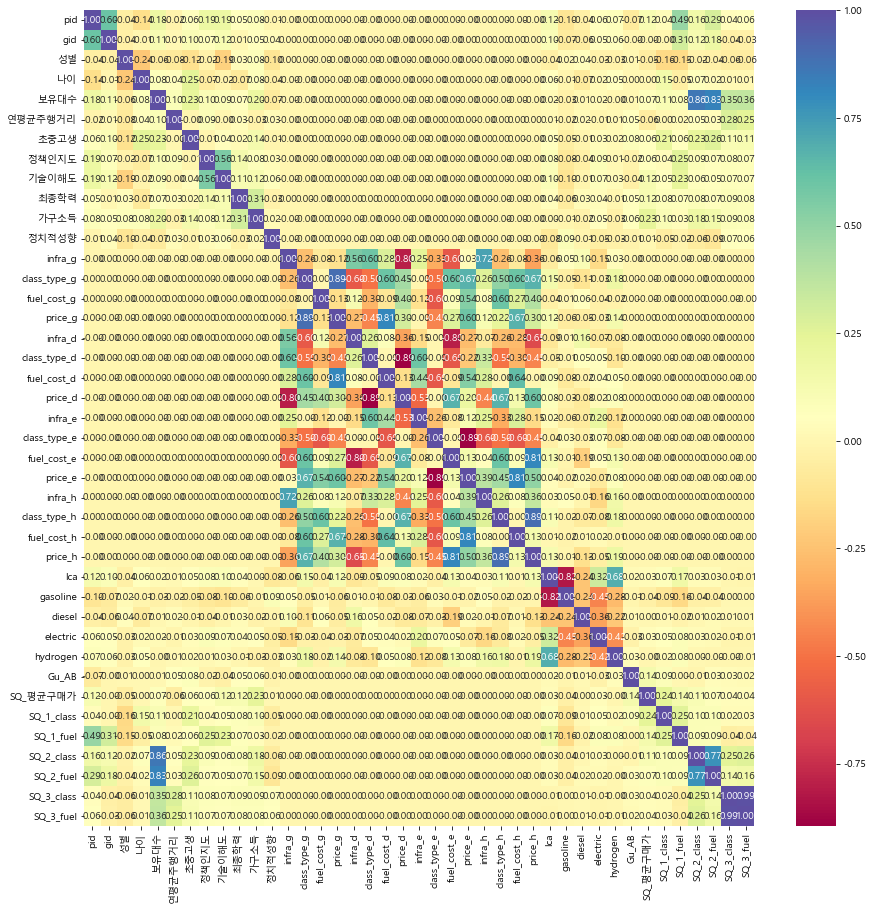

In [25]:
corr_wosq=df_wosq.corr()
plt.figure(figsize=(15,15))
sns.heatmap(data=corr,annot=True,fmt='.2f',cmap="Spectral")

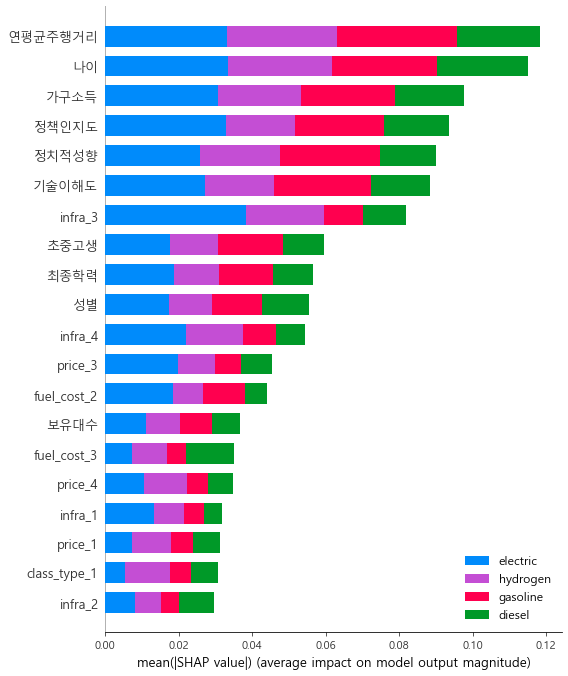

In [26]:
shap.summary_plot(shap_values,x_wosq.values,
                  plot_type='bar',
                  class_names=class_names,
                  feature_names=x_wosq.columns)

# 결과 분석 - Gasoline

In [ ]:
shap.summary_plot(shap_values[0],x_wosq.values,
                  class_names=class_names,
                  feature_names=x_wosq.columns)

# 결과 분석 - Diesel

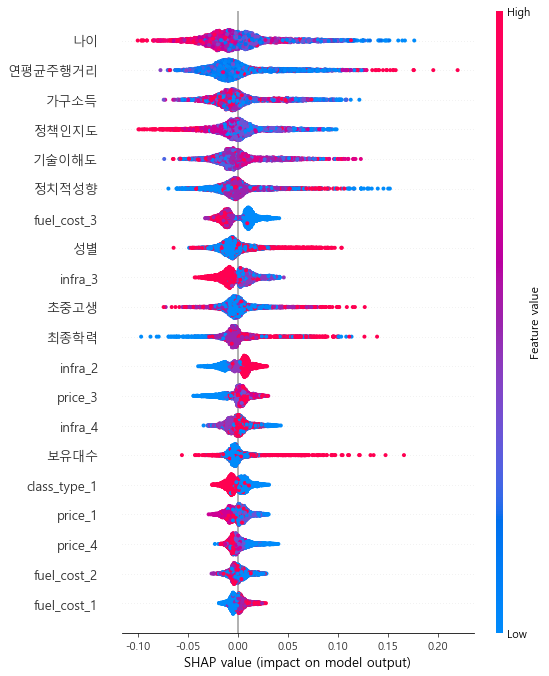

In [28]:
shap.summary_plot(shap_values[1],x_wosq.values,
                  class_names=class_names,
                  feature_names=x_wosq.columns)

# 결과 분석 - Electric

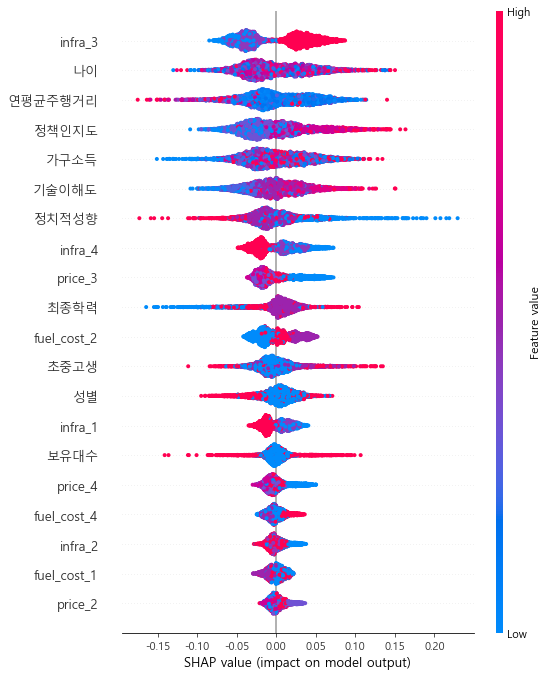

In [29]:
shap.summary_plot(shap_values[2],x_wosq.values,
                  class_names=class_names,
                  feature_names=x_wosq.columns)

# 결과 분석 - Hydrogen

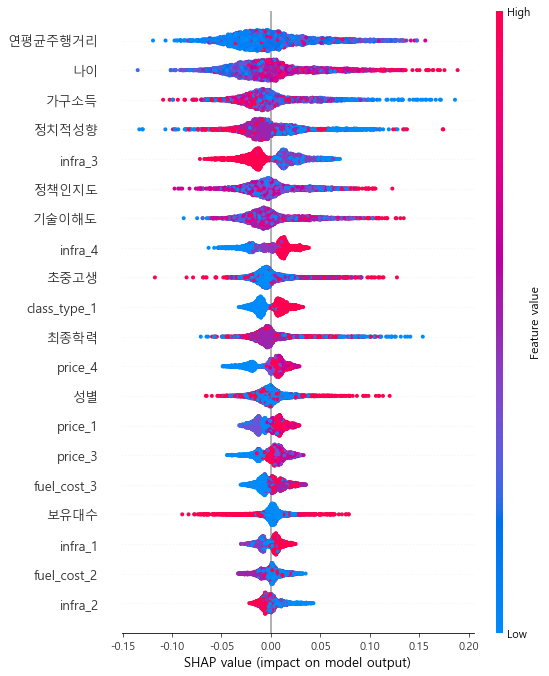

In [30]:
shap.summary_plot(shap_values[3],x_wosq.values,
                  class_names=class_names,
                  feature_names=x_wosq.columns)